In [187]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

**<h1>1.2.1<h1>**

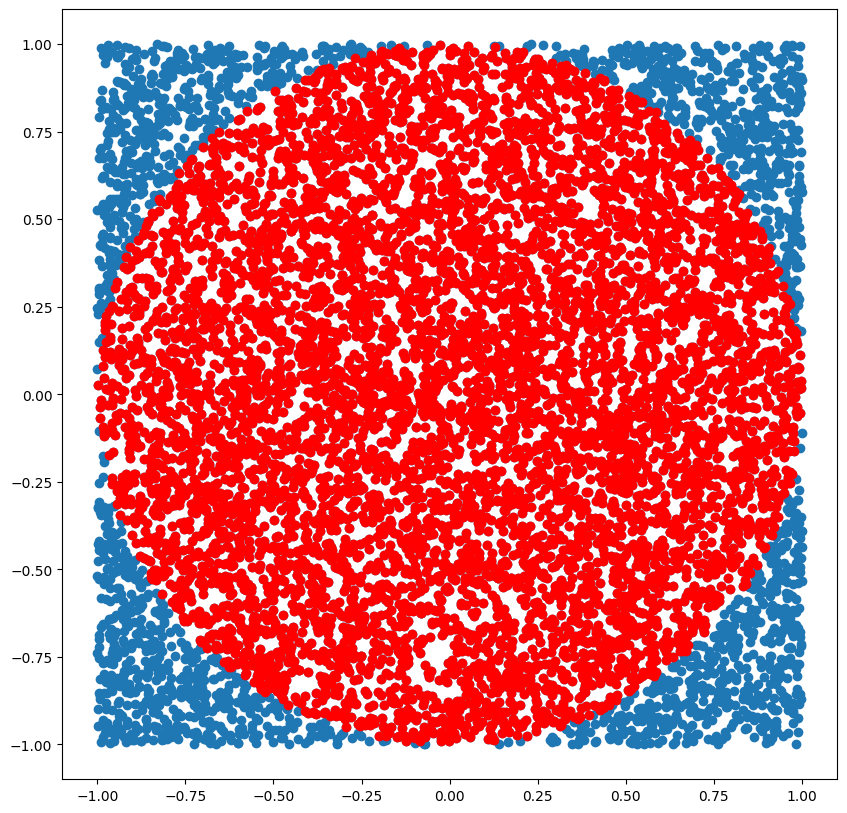

In [188]:
X = np.random.uniform(-1, 1, size=(2, 10000))
Y = np.array([X.T[i] for i in range(len(X.T))  if (X.T[i][0]**2 + X.T[i][1]**2) <= 1]).T

fig = plt.figure(figsize=(10, 10))
plt.scatter(X[0], X[1])
plt.scatter(Y[0], Y[1], c='r')

In [189]:
print("|y| average is", abs(Y[1]).mean())

|y| average is 0.4216515238223817


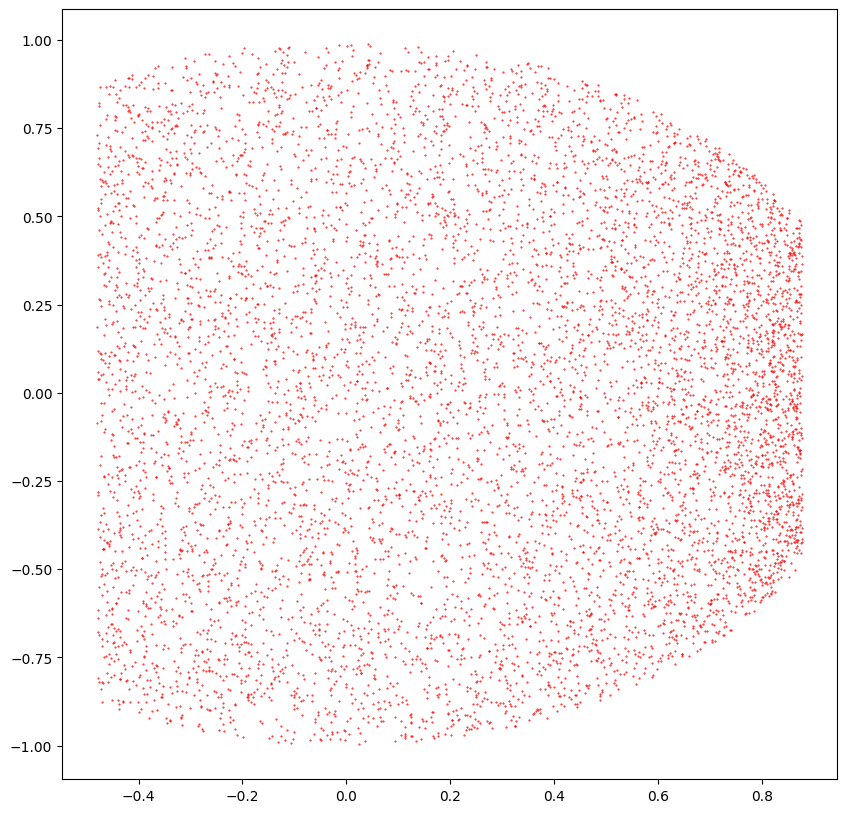

In [201]:
size = int(np.pi/4 * 10000)
x = np.sin(np.pi/2 * np.random.uniform(0, 1, size))
y = np.random.uniform(-np.sqrt(1 - x**2), np.sqrt(1 - x**2), size)
fig = plt.figure(figsize=(10, 10))
#plt.scatter(X[0], X[1])
plt.scatter(x, y, c='r', s=0.2)

In [7]:
print("|y| average is", abs(y).mean())

|y| average is 0.39167883259526776


**<h2>1.2.2<h2>**

In [8]:
def f(x):
  return abs(1/(2*np.pi) * np.exp(-x**2 / 2))

def g(x):
  return np.exp(-x)

In [9]:
count = 0
c = np.sqrt(np.e / (2 * np.pi))
Y = []
while(len(Y) < 10000):
  X = np.random.exponential(1, 1)
  count += 1
  for x in X:
    p = f(x)/(c*g(x))
    coin = np.random.binomial(size=1, n=1, p=p)
    if(coin == 1):
      Y.append(x)

print("C = ", c, "\nTotal num of |norm| data is", len(Y), "\nTotal num of exp data is", count)    

C =  0.657744623479457 
Total num of |norm| data is 10000 
Total num of exp data is 33208


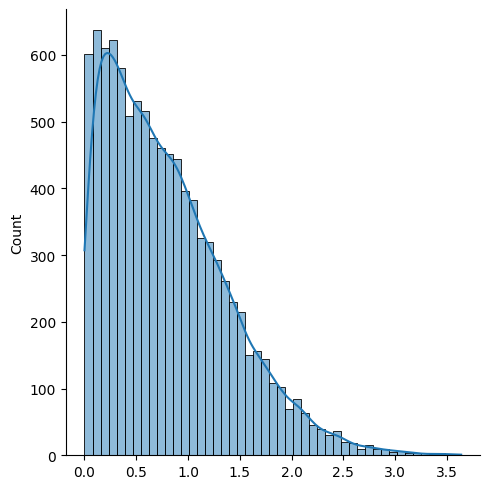

In [10]:
sb.displot(Y, edgecolor="black", kde=True)

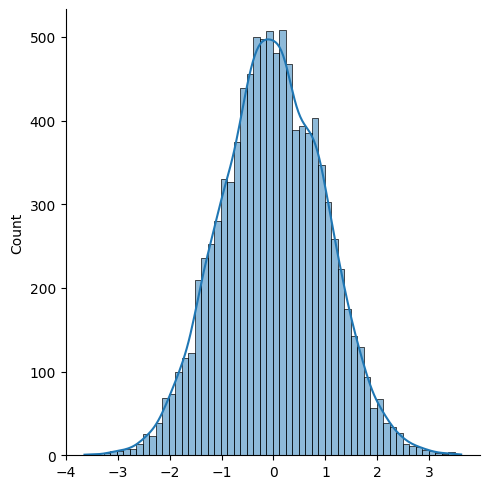

In [11]:
Z = []
for y in Y:
  coin = np.random.binomial(size=1, n=1, p=0.5)
  if(coin == 1):
    Z.append(y)
  else:
    Z.append(-y)
sb.displot(Z, edgecolor="black", kde=True)    

**<h3>1.2.3<h3>**

In [202]:
def Is_Y_in_circle(X, Y, R):
    d = (X[0] - Y[0])**2 + (X[1] - Y[1])**2
    if d <= R**2:
        return True
    else:
        return False    

- **Start vector $X_0$**

In [203]:
X_s = []
X_s.append([float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))])
for i in range(1, 5):
    check = False
    while check != True:
        Y = [float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))]
        count = 0
        for x in X_s:
            if Is_Y_in_circle(x, Y, 40) == True:
                count += 1
        if count == 0:
            X_s.append(Y)
            check = True      
X_s = np.array(X_s)                          

In [204]:
print(X_s)

[[64.14315532 15.19268727]
 [94.3435454  81.79920882]
 [50.78567621 83.49140424]
 [12.7313479  41.89387715]
 [ 3.97740885 89.43507637]]


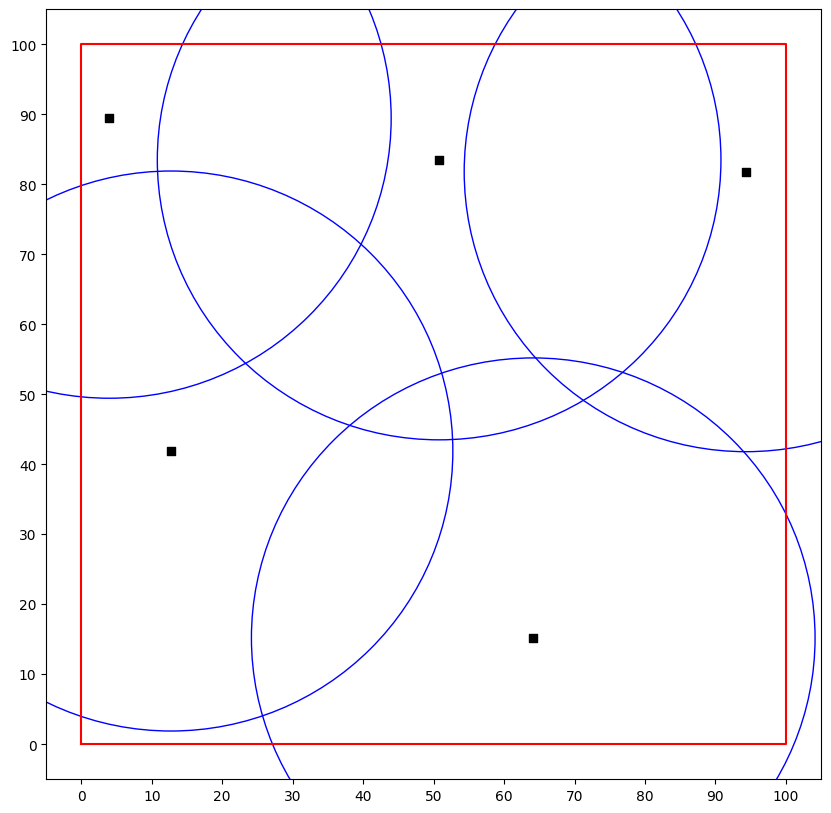

In [205]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.scatter(X_s.T[0], X_s.T[1], marker="s", c="black")
plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], c="r")
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
for x in X_s:
    circle = plt.Circle((x[0], x[1]), 40, color='b', fill=False)
    ax.add_patch(circle)

- **Make $X_{i+1}$ from $X_{i}$**

In [206]:
def X_new(X_start):
    for d in range(5):
        X = X_start
        check = False
        while check != True:
            Y = [float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))]
            count = 0
            for i in range(5):
                if i != d:
                    if Is_Y_in_circle(X[i], Y, 40) == True:
                        count += 1
            if count == 0:
                X[d] = Y
                check = True      
    return np.array(X)      

- **Calculation of the final vector by using sequence with 10000 elements**

In [207]:
X_f = X_s
for i in range(10000):
    X_i = X_new(X_f)
    X_f = X_i

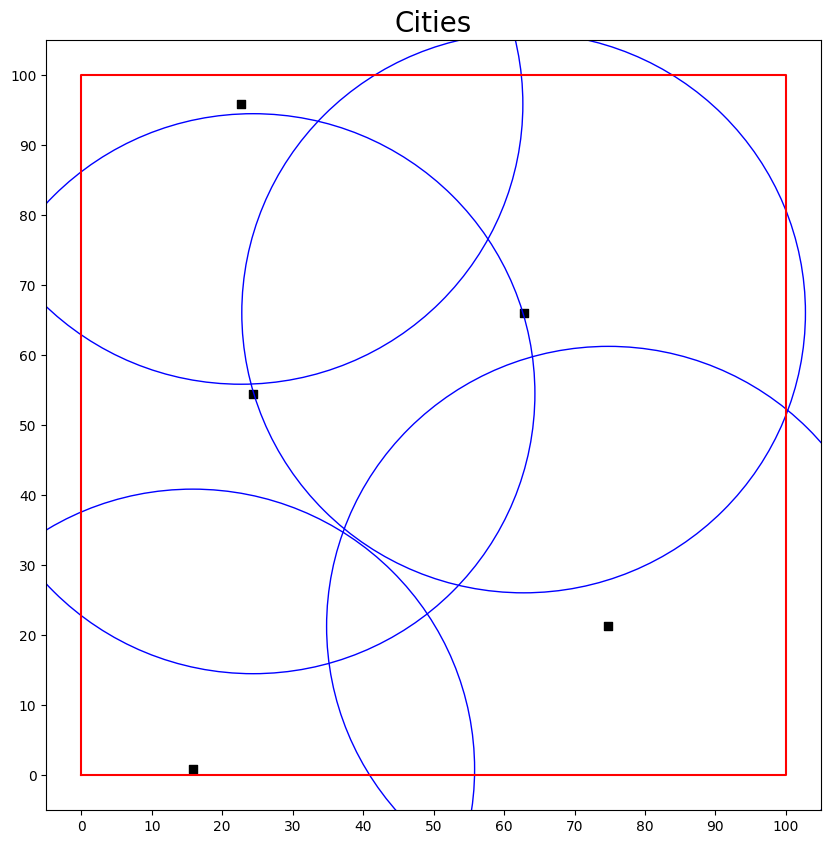

In [208]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.scatter(X_f.T[0], X_f.T[1], marker="s", c="black")
plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], c="r")
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
plt.title("Cities", fontsize=20)
for x in X_f:
    circle = plt.Circle((x[0], x[1]), 40, color='b', fill=False)
    ax.add_patch(circle)

- **Adding mines**

In [209]:
Y_s = []

for i in range(2):
    for i in range(5):
        check = False
        while check != True:
            Y = [float(np.random.uniform(max(X_f[i][0] - 20, 0), min(X_f[i][0] + 20, 100), 1)), float(np.random.uniform(max(X_f[i][1] - 20, 0), min(X_f[i][1] + 20, 100), 1))]
            #Y = [float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))]
            if ((Is_Y_in_circle(X=X_f[i], Y=Y, R=20) == True) & (Is_Y_in_circle(X=X_f[i], Y=Y, R=10) == False)):
                count = 0
                for y in Y_s:
                    if Is_Y_in_circle(y, Y, 10) == True:
                        count += 1
                if count == 0:
                    Y_s.append(Y)
                    check = True              
Y_s = np.array(Y_s) 

In [210]:
print(Y_s)

[[42.24670133 46.30497167]
 [30.69618229  1.52743799]
 [10.89726655 97.62538554]
 [45.70031353 66.57546881]
 [77.07790205 37.86592538]
 [22.62804539 42.67242146]
 [ 4.50072887 12.85491732]
 [18.60052482 76.94175525]
 [57.99799201 79.49968112]
 [66.89719669  9.39619454]]


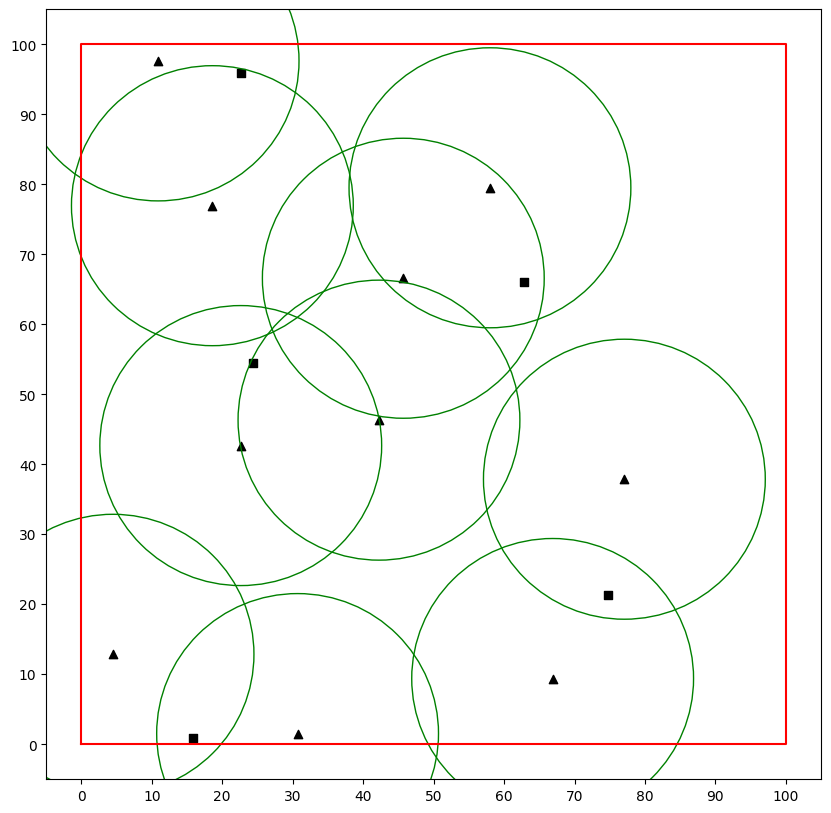

In [211]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.scatter(X_f.T[0], X_f.T[1], marker="s", c="black")
plt.scatter(Y_s.T[0], Y_s.T[1], marker="^", c="black")
plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], c="r")
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
for y in Y_s:
    #circle1 = plt.Circle((y[0], y[1]), 10, color='m', fill=False)
    circle2 = plt.Circle((y[0], y[1]), 20, color='g', fill=False)
    #ax.add_patch(circle1)
    ax.add_patch(circle2)

In [212]:
def Y_new(Y_start):
    for d in range(10):
        Y = Y_start
        check = False
        while check != True:
            if d < 5:
                j = d
            else:
                j = d - 5
            Z = [float(np.random.uniform(max(X_f[j][0] - 20, 0), min(X_f[j][0] + 20, 100), 1)), float(np.random.uniform(max(X_f[j][1] - 20, 0), min(X_f[j][1] + 20, 100), 1))]
            if ((Is_Y_in_circle(X=X_f[j], Y=Z, R=20) == True) & (Is_Y_in_circle(X=X_f[j], Y=Z, R=10) == False)):
                count = 0
                for i in range(10):
                    if i != d:
                        if Is_Y_in_circle(Y[i], Z, 10) == True:
                            count += 1
                if count == 0:
                    Y[d] = Z
                    check = True              
    return np.array(Y)  

In [213]:
Y_f = Y_s
for i in range(10000):
    Y_i = Y_new(Y_f)
    Y_f = Y_i

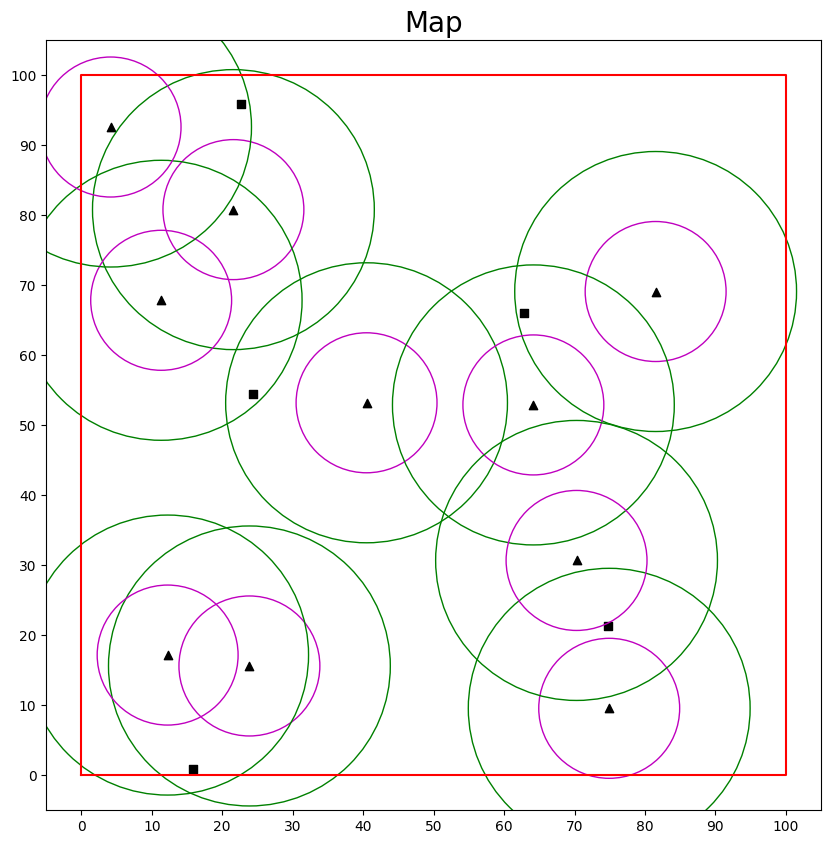

In [214]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.scatter(X_f.T[0], X_f.T[1], marker="s", c="black")
plt.scatter(Y_f.T[0], Y_f.T[1], marker="^", c="black")
plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], c="r")
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
plt.title("Map", fontsize=20)
'''for x in X_f:
    circle = plt.Circle((x[0], x[1]), 40, color='b', fill=False)
    ax.add_patch(circle)'''
for y in Y_f:
    circle1 = plt.Circle((y[0], y[1]), 10, color='m', fill=False)
    circle2 = plt.Circle((y[0], y[1]), 20, color='g', fill=False)
    ax.add_patch(circle1)
    ax.add_patch(circle2)

"for y in Y_f:\n    circle1 = plt.Circle((y[0], y[1]), 10, color='m', fill=False)\n    circle2 = plt.Circle((y[0], y[1]), 20, color='g', fill=False)\n    ax.add_patch(circle1)\n    ax.add_patch(circle2)"

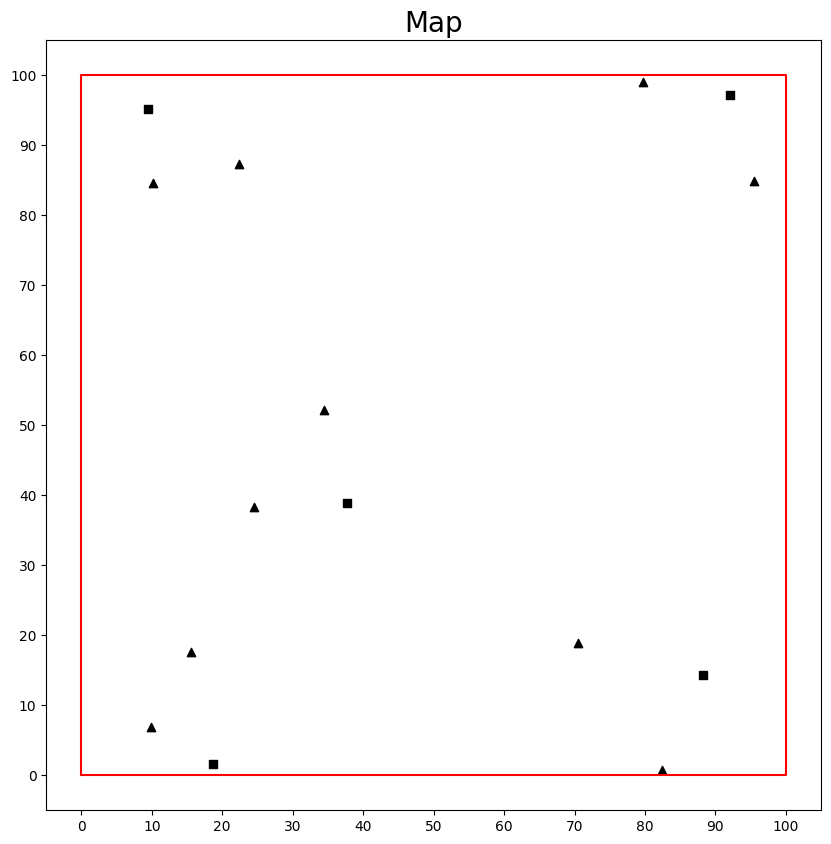

In [172]:
def Is_Y_in_circle(X, Y, R):
    d = (X[0] - Y[0])**2 + (X[1] - Y[1])**2
    if d <= R**2:
        return True
    else:
        return False 

def X_new(X_start):
    for d in range(5):
        X = X_start
        check = False
        while check != True:
            Y = [float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))]
            count = 0
            for i in range(5):
                if i != d:
                    if Is_Y_in_circle(X[i], Y, 40) == True:
                        count += 1
            if count == 0:
                X[d] = Y
                check = True      
    return np.array(X)    

def Y_new(Y_start):
    for d in range(10):
        Y = Y_start
        check = False
        while check != True:
            if d < 5:
                j = d
            else:
                j = d - 5
            Z = [float(np.random.uniform(max(X_f[j][0] - 20, 0), min(X_f[j][0] + 20, 100), 1)), float(np.random.uniform(max(X_f[j][1] - 20, 0), min(X_f[j][1] + 20, 100), 1))]
            if ((Is_Y_in_circle(X=X_f[j], Y=Z, R=20) == True) & (Is_Y_in_circle(X=X_f[j], Y=Z, R=10) == False)):
                count = 0
                for i in range(10):
                    if i != d:
                        if Is_Y_in_circle(Y[i], Z, 10) == True:
                            count += 1
                if count == 0:
                    Y[d] = Z
                    check = True              
    return np.array(Y)         

X_s = []
X_s.append([float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))])
for i in range(1, 5):
    check = False
    while check != True:
        Y = [float(np.random.uniform(0, 100, 1)), float(np.random.uniform(0, 100, 1))]
        count = 0
        for x in X_s:
            if Is_Y_in_circle(x, Y, 40) == True:
                count += 1
        if count == 0:
            X_s.append(Y)
            check = True      
X_s = np.array(X_s)   

X_f = X_s
for i in range(10000):
    X_f = X_new(X_f)
    Y_f = Y_new(Y_f)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

plt.scatter(X_f.T[0], X_f.T[1], marker="s", c="black")
plt.scatter(Y_f.T[0], Y_f.T[1], marker="^", c="black")
plt.plot([0, 0, 100, 100, 0], [0, 100, 100, 0, 0], c="r")
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
plt.title("Map", fontsize=20)
'''for x in X_f:
    circle = plt.Circle((x[0], x[1]), 40, color='b', fill=False)
    ax.add_patch(circle)'''
'''for y in Y_f:
    circle1 = plt.Circle((y[0], y[1]), 10, color='m', fill=False)
    circle2 = plt.Circle((y[0], y[1]), 20, color='g', fill=False)
    ax.add_patch(circle1)
    ax.add_patch(circle2)'''
